In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [3]:
# Load the dataset
HIV_df = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report (1).csv")
HIV_df.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,1.4,1.4,0.0


In [4]:
# Identify and handle malformed strings
for column in ['Borough', 'UHF', 'Gender', 'Age', 'Race']:
    try:
        # Convert to numeric, replacing 'All' with NaN
        HIV_df[column] = pd.to_numeric(HIV_df[column], errors='coerce')
    except ValueError as e:
        print(f"Error converting column '{column}': {e}")

In [5]:
# Determine the number of unique values in each column.
HIV_df.nunique()

Year                                  10
Borough                                0
UHF                                    0
Gender                                 0
Age                                    0
Race                                   0
HIV diagnoses                        409
HIV diagnosis rate                  1963
Concurrent diagnoses                 157
% linked to care within 3 months     125
AIDS diagnoses                       313
AIDS diagnosis rate                 1525
PLWDHI prevalence                    169
% viral suppression                  170
Deaths                               374
Death rate                           757
HIV-related death rate               422
Non-HIV-related death rate           589
dtype: int64

In [6]:
# Handle missing values
HIV_df.fillna(HIV_df.mean(), inplace=True)

In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_columns = ['Borough', 'UHF', 'Gender', 'Age', 'Race']

In [8]:
HIV_df = pd.get_dummies(HIV_df, columns=categorical_columns)

In [9]:
# Separate features (X) and target variable (y)
X = HIV_df.drop('HIV diagnoses', axis=1)
y = HIV_df['HIV diagnoses']

In [10]:
HIV_df

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,3379.0,48.3,640.0,66.000000,2366.0,33.8,1.10000,71.000000,2040,13.600000,5.800000,7.800000
1,2011,2595.0,79.1,480.0,66.000000,1712.0,52.2,1.70000,72.000000,1423,13.400000,5.700000,7.700000
2,2011,733.0,21.1,153.0,66.000000,622.0,17.6,0.60000,68.000000,605,14.000000,6.000000,8.000000
3,2011,51.0,99999.0,7.0,63.000000,32.0,99999.0,99999.00000,55.000000,12,11.100000,5.700000,5.400000
4,2011,47.0,13.6,4.0,64.000000,22.0,6.4,0.10000,57.000000,1,1.400000,1.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021,0.0,0.0,0.0,8178.282774,0.0,0.0,0.00000,532.082412,0,7.382774,4003.388718,4005.766403
31921,2021,0.0,0.0,0.0,8178.282774,0.0,0.0,68.20455,1.000000,0,0.000000,0.000000,0.000000
31922,2021,0.0,0.0,0.0,8178.282774,0.0,0.0,0.70000,0.500000,0,0.000000,0.000000,0.000000
31923,2021,0.0,0.0,0.0,8178.282774,0.0,0.0,0.00000,532.082412,0,7.382774,4003.388718,4005.766403


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=3, activation='tanh'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Check the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Additional hidden layers
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='tanh'))

# Check the structure of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 5)                 65        
                                                                 
 dense_22 (Dense)            (None, 10)                60        
                                                                 
 dense_23 (Dense)            (None, 8)                 88        
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 222 (888.00 Byte)
Trainable params: 222 (888.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=3, activation='tanh'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming 'history' is the result of your model training
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))


Epoch 1/100
799/799 [==============================] - 3s 3ms/step - loss: -53.5756 - accuracy: 0.2747 - val_loss: -116.5916 - val_accuracy: 0.1753
Epoch 2/100
799/799 [==============================] - 2s 2ms/step - loss: -125.6969 - accuracy: 0.1742 - val_loss: -125.6796 - val_accuracy: 0.1785
Epoch 3/100
799/799 [==============================] - 2s 3ms/step - loss: -141.0573 - accuracy: 0.1755 - val_loss: -141.5582 - val_accuracy: 0.1806
Epoch 4/100
799/799 [==============================] - 2s 2ms/step - loss: -140.9091 - accuracy: 0.1771 - val_loss: -141.9129 - val_accuracy: 0.1818
Epoch 5/100
799/799 [==============================] - 2s 2ms/step - loss: -149.4526 - accuracy: 0.1779 - val_loss: -150.7056 - val_accuracy: 0.1826
Epoch 6/100
799/799 [==============================] - 2s 2ms/step - loss: -151.3255 - accuracy: 0.1807 - val_loss: -150.9834 - val_accuracy: 0.1872
Epoch 7/100
799/799 [==============================] - 2s 3ms/step - loss: -153.3224 - accuracy: 0.1836 - v

Epoch 56/100
799/799 [==============================] - 2s 2ms/step - loss: -158.4260 - accuracy: 0.5939 - val_loss: -158.8190 - val_accuracy: 0.5945
Epoch 57/100
799/799 [==============================] - 2s 2ms/step - loss: -158.4288 - accuracy: 0.5938 - val_loss: -158.8371 - val_accuracy: 0.5958
Epoch 58/100
799/799 [==============================] - 2s 3ms/step - loss: -158.4354 - accuracy: 0.5950 - val_loss: -158.8381 - val_accuracy: 0.5967
Epoch 59/100
799/799 [==============================] - 2s 2ms/step - loss: -158.4218 - accuracy: 0.5945 - val_loss: -158.8368 - val_accuracy: 0.5967
Epoch 60/100
799/799 [==============================] - 2s 2ms/step - loss: -158.4332 - accuracy: 0.5948 - val_loss: -158.8384 - val_accuracy: 0.5967
Epoch 61/100
799/799 [==============================] - 2s 2ms/step - loss: -158.4268 - accuracy: 0.5956 - val_loss: -158.8346 - val_accuracy: 0.5942
Epoch 62/100
799/799 [==============================] - 2s 2ms/step - loss: -158.4351 - accuracy: 0.

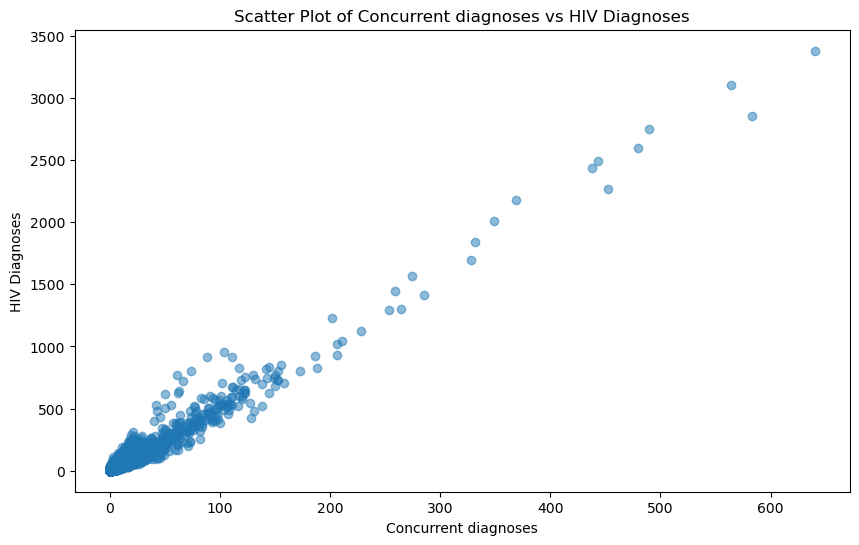

In [21]:
import matplotlib.pyplot as plt

# Assuming 'HIV_df' is your DataFrame and 'feature_name' is the feature you want to plot
feature_name = 'Concurrent diagnoses'

plt.figure(figsize=(10, 6))
plt.scatter(HIV_df[feature_name], HIV_df['HIV diagnoses'], alpha=0.5)
plt.title(f'Scatter Plot of {feature_name} vs HIV Diagnoses')
plt.xlabel(feature_name)
plt.ylabel('HIV Diagnoses')
plt.show()


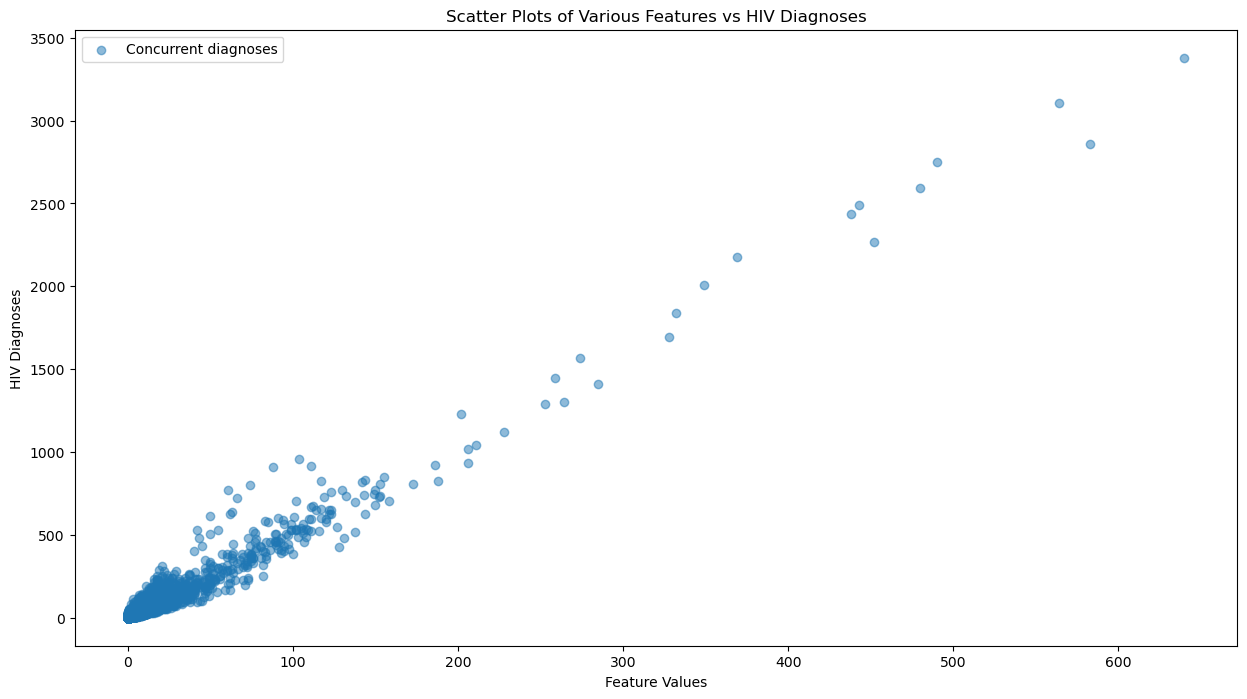

In [27]:
features_to_plot = ['Concurrent diagnoses', 'SomeOtherFeature', 'AnotherFeature']

plt.figure(figsize=(15, 8))
for feature_name in features_to_plot:
    if feature_name in HIV_df.columns:
        plt.scatter(HIV_df[feature_name], HIV_df['HIV diagnoses'], alpha=0.5, label=feature_name)

plt.title('Scatter Plots of Various Features vs HIV Diagnoses')
plt.xlabel('Feature Values')
plt.ylabel('HIV Diagnoses')
plt.legend()
plt.show()


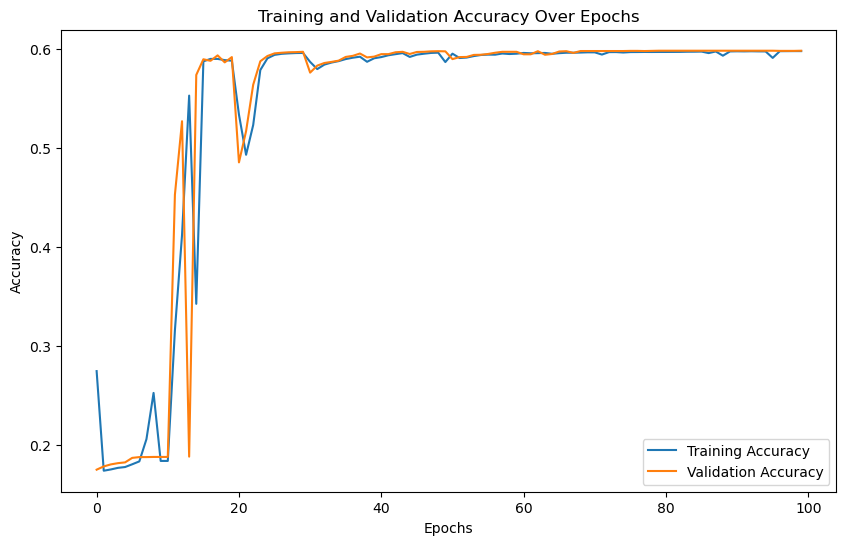

In [30]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


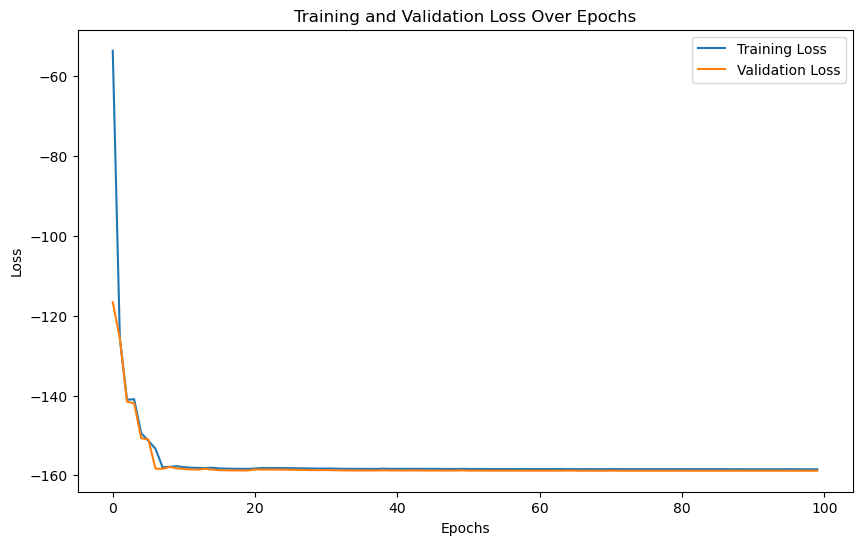

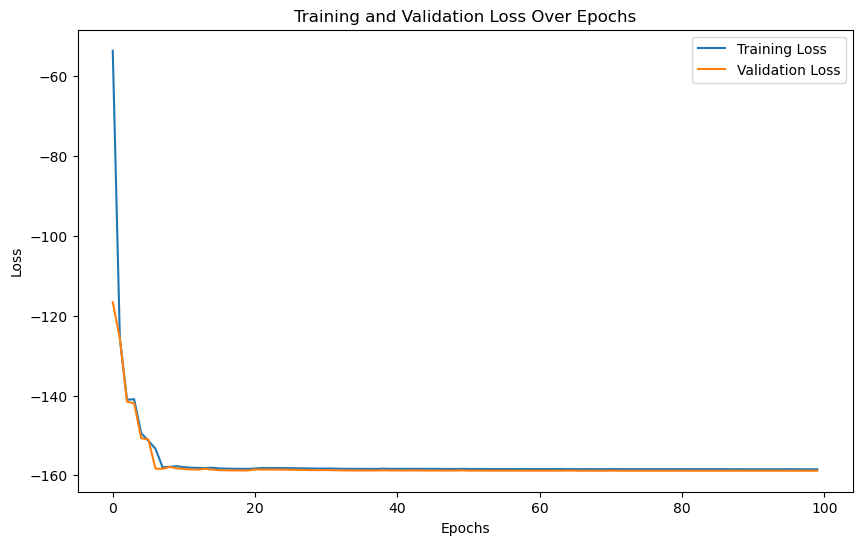

In [31]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

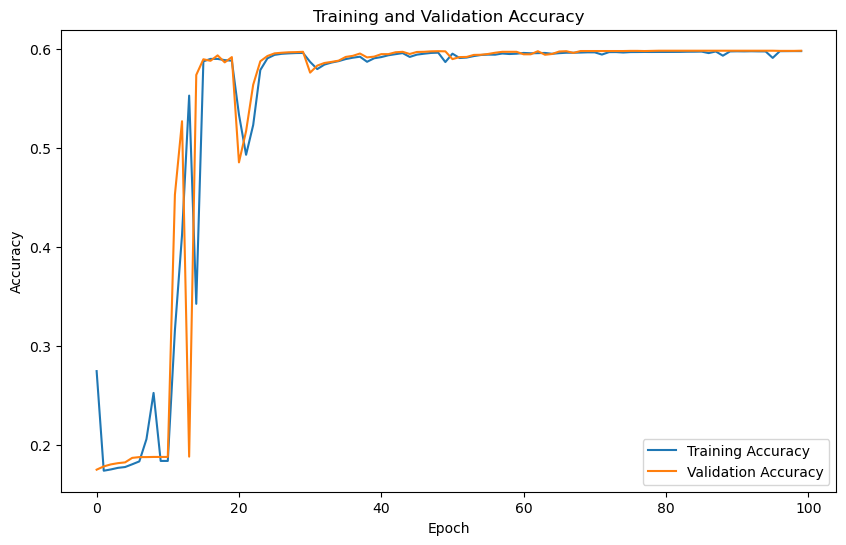

In [32]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


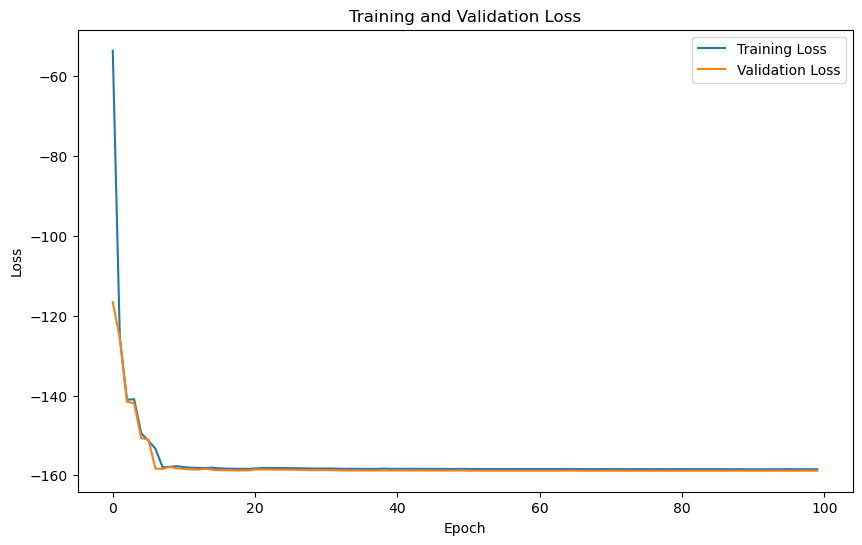

In [33]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
